<a href="https://colab.research.google.com/github/Freesoul-tech/AI-Data-Engineering/blob/main/NeuralNet30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Normalize pixel values
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Split validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(48000, 784)
(10000, 784)
float32
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        

In [8]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [9]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Load and preprocess MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784).astype('float32') / 255
X_test = X_test.reshape(-1, 784).astype('float32') / 255

# Split validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [10]:
X_train.shape  # (48000, 784)
X_val.shape    # (12000, 784)
X_test.shape   # (10000, 784)


(10000, 784)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Validation Accuracy:", model.score(X_val, y_val))


Validation Accuracy: 0.9220833333333334


In [12]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8698 - loss: 0.4522 - val_accuracy: 0.9588 - val_loss: 0.1398
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9654 - loss: 0.1167 - val_accuracy: 0.9662 - val_loss: 0.1132
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9761 - loss: 0.0741 - val_accuracy: 0.9704 - val_loss: 0.0970
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9835 - loss: 0.0533 - val_accuracy: 0.9743 - val_loss: 0.0875
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9871 - loss: 0.0411 - val_accuracy: 0.9707 - val_loss: 0.1004
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9891 - loss: 0.0338 - val_accuracy: 0.9756 - val_loss: 0.0934
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9912 - loss: 0.0268 - val_accuracy: 0.9782 - val_loss: 0.0846
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9929 - loss: 0.021

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


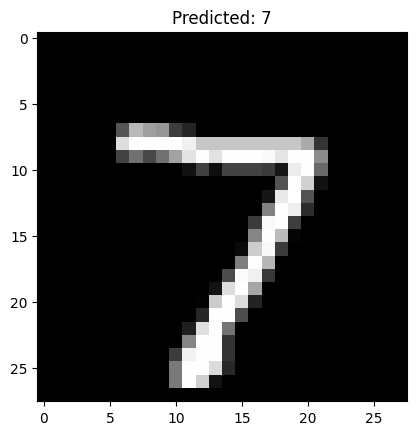

In [13]:
import matplotlib.pyplot as plt
import numpy as np

sample = X_test[0].reshape(1, -1)
predicted = model.predict(sample)
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predicted)}")
plt.show()


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = np.argmax(model.predict(X_val), axis=1)
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1156    0    5    0    3    0    2    1    7    1]
 [   0 1308    4    1    1    0    3    0    4    1]
 [   0    6 1142    2    3    0    2   10    7    2]
 [   0    0   15 1169    0   15    0    2    9    9]
 [   1    0    1    0 1147    0    0    5    0   22]
 [   3    1    1    3    4 1076    2    3    7    4]
 [   0    0    1    0    2    7 1162    0    5    0]
 [   0    3    9    0    2    2    0 1261    2   20]
 [   2    0   11    4    4    6    2    1 1120   10]
 [   2    1    1    1    4    2    1    3    1 1178]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.96      0.97      0.97      1174
           3       0.99      0.96      0.97      1219
           4       0.98      0.98      0.98      1176
           5       0.97      0.97      0.97      1104
           6       0.99      0.99      0.99      

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


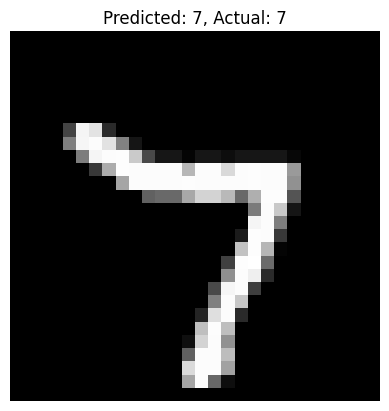

In [15]:
import matplotlib.pyplot as plt

def show_prediction(index):
    image = X_val[index].reshape(28, 28)
    prediction = np.argmax(model.predict(X_val[index].reshape(1, -1)))
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {prediction}, Actual: {y_val[index]}")
    plt.axis('off')
    plt.show()

show_prediction(0)


In [16]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_val_cnn = X_val.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn_model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, validation_data=(X_val_cnn, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9054 - loss: 0.3239 - val_accuracy: 0.9740 - val_loss: 0.0859
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9821 - loss: 0.0577 - val_accuracy: 0.9803 - val_loss: 0.0636
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9902 - loss: 0.0343 - val_accuracy: 0.9840 - val_loss: 0.0568
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.9930 - loss: 0.0220 - val_accuracy: 0.9850 - val_loss: 0.0485
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9956 - loss: 0.0147 - val_accuracy: 0.9856 - val_loss: 0.0562
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9967 - loss: 0.0108 - val_accuracy: 0.9873 - val_loss: 0.0489
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.9976 - loss: 0.0082 - val_accuracy: 0.9857 - val_loss: 0.0581
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9979 -

In [17]:
import numpy as np

y_pred = np.argmax(model.predict(X_val), axis=1)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [18]:
false_indices = np.where(y_pred != y_val)[0]


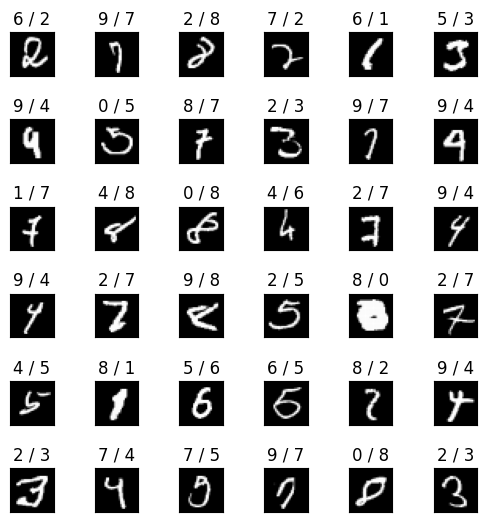

In [19]:
import matplotlib.pyplot as plt

num = min(36, len(false_indices))  # Show up to 36 misclassified samples
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8, bottom=0, top=0.8, hspace=1, wspace=0.5)

for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title(f"{y_pred[false_indices[i]]} / {y_val[false_indices[i]]}")
    ax.imshow(X_val[false_indices[i]].reshape(28, 28), cmap='gray')
plt.show()
